# Sesión 10: Análisis de conglomerados (Cluster analysis)

Dificultad 😀😀 (muchos conceptos)  
Uso de código: 🐍🐍 (poco)

El análisis de conglomerados es una técnica exploratoria que permite identificar grupos homogéneos (conglomerados o “clusters”) en un conjunto de elementos heterogéneos (individuos u objetos). Existen varias técnicas en el análisis de conglomerados,entre las más comunes están el método jerárquico y k-medias.  Esta técnica se utiliza con frecuencia para la segmentación de mercados.

## Práctica 1: Método jerárquico
Aplicaremos el método jerárquico a un conjunto de datos. Hay dos paquetes muy utilizados: scikitlearn y scipy, por su facilidad, utilizaremos el segundo.

In [1]:
# Con Windows para limitar el uso de núcleos del procesador
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

Carga el archivo de ejemplo `data/b11_cerveza.xlsx`

In [2]:
df = pd.read_excel('data/b11_cerveza.xlsx')

En este ejemplo no es necesario pero es conveniente realizar un análisis exploratorio y evaluar la presencia de datos nulos, datos perdidos, datos atípicos y datos repetidos.

In [3]:
df.head()

,Cerveza,Tipo,Calorias,Alcohol,Contenido,Costo100ml,Pais,Importada,Bajo
0,BARRILITO,Cerveza clara,32,3.56,325,3.00,México,0,0
1,DOS EQUIS XX Lager Especial,Cerveza,34,4.45,355,4.08,México,0,0
2,GUINESS DRAUGHT,Cerveza oscura,34,4.11,330,9.70,Irlanda,1,0
3,INDIO PILSNER PLATA,Cerveza,34,4.18,473,3.17,México,0,0
4,INDIO,Cerveza,35,4.05,1200,2.58,México,0,0


**Selección de variables**: En el análisis de conglomerados, primeramente, se debe decidir qué variables se utilizarán. Es recomendable no utilizar demasiadas variables debido a que se incrementa la complejidad en la identificación de los grupos. Es recomendable además que no estén altamente correlacionadas (p. ej. un coeficiente de correlación mayor a 0.90). En caso de que se tengan muchas variables correlacionadas entre sí, se puede realizar previamente un análisis factorial y utilizar los puntajes factoriales para el análisis de conglomerados.

Para este ejemplo, debido a que la variable “Aporte calórico” y “Porcentaje de alcohol” tienen un coeficiente de correlación de 0.909, de ambas se utilizará solamente “Aporte calórico”. Adicionalmente se considerará la variable de “Costo”. 

In [4]:
X = df[['Calorias', 'Costo100ml']]

**Estandarizar variables**: Es importante que las variables puedan ser comparables, por lo tanto, se recomienda estandarizar las variables. *StandarScaler* transforma la variable a una distribución con media cero y desviación estándar igual a uno.

In [5]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

**Seleccionar método**. Aplicaremos la función *linkage** de la biblioteca *scipy*. Se pueden definir varios parámetros, es decir, valores que controlan el comportamiento del algoritmo:
1. *metric*: entre las principales medidas están
    - *euclidean*: es la predeterminada y la más común. Corresponde a la raíz cuadrada de la suma de las diferencias al cuadrado de los valores de las variables.
    - *cityblock*: Utiliza la suma de los valores absolutos de las diferencias de los valores de las variables.

2. *linkage*: es el método que se utilizará para determinar la similitud entre pares de objetos. Entre otros están:
    - *ward*: fusiona aquellos dos grupos que menos incrementen la suma de los cuadrados de las desviaciones.
    - *average*: es el promedio de las distancias entre todos los pares de ambos grupos
    - *complete*: utiliza las distancias máximas entre cualquier par de elementos en dos grupos
    - *single*: utiliza la distancia entre las observaciones más cercanas entre cualquier par de elementos en dos grupos.
  
Si se desea obtener conglomerados (*clusters*) de tamaños similares y no existen valores atípicos, se recomienda utilizar el método de Ward.

In [6]:
Z = linkage(X_std, method='ward', metric='euclidean')

Para visualizar el dendrograma, utilizamos la función  `dendrogram()` junto con `pyplot`

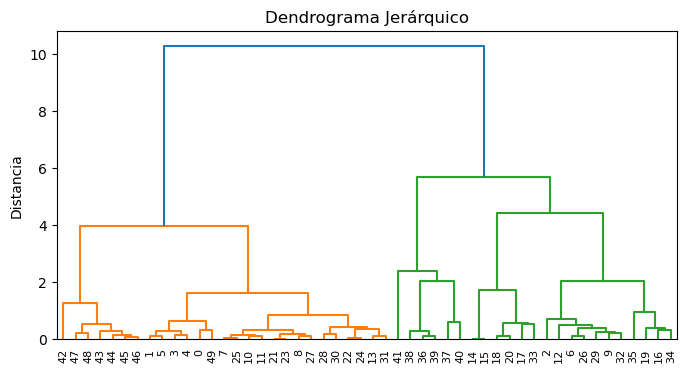

In [7]:
plt.figure(figsize=(8, 4))
plt.title('Dendrograma Jerárquico')
plt.ylabel('Distancia')
dendrogram(Z)
plt.show()

Las líneas verticales representan distancias, mientras que las líneas horizontales sirven para unir las observaciones. A partir de este gráfico podemos definir los clusters (en diferente color).

## Práctica 2: Método de k-medias

Repetiremos el ejercicio utilizando el método jerárquico. El algoritmo de este método no está basado en distancias sino en la variación dentro de los conglomerados, por lo tanto, no se requiere establecer una medida de distancia. El proceso inicia asignando aleatoriamente los elementos a cierto número de conglomerados. Los elementos son sucesivamente reasignados a otros conglomerados para minimizar la variación dentro de cada conglomerado.

El método de k-medias se considera superior a los métodos jerárquicos (debido a que es menos afectado por valores atípicos) y es más conveniente para muestras grandes. Es recomendable utilizarlo sólo con variables cuantitativas o en algunos casos con variables ordinales.  El inconveniente principal es que se debe especificar cuántos conglomerados se van a utilizar, por ello, muchos investigadores recomiendan previamente utilizar el método jerárquico

In [8]:
from sklearn.cluster import KMeans

In [9]:
# Estandarizar variables
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

En este procedimiento se establece el número de grupos o *clusters* (k). Posteriomente
1. Se crean k "centros" en ubicaciones aleatorias.
2. Para cada observación:
    - Se calcula la distancia a los k centros
    - La observación es asignada al grupo con el centro más cercano.
3. Los centros se mueven al centro de su respectivo grupo.
4. Los pasos 2 y 3 se repiten hasta que no existan cambios en la pertenencia.

El método de k-medias es apropiado cuando se asume que los grupos tienen forma convexa (p. ej. círculo) y tamaños similares. Si no es el caso, conviene explorar otras metodologías para el análisis de conglomerados. 

Utilizaremos la función de k-means en scikit-learn. El parámetro más importante es *n_clusters* que indica el número de grupos (k). Otro parámetro es *n_jobs=-1* para utilizar todos los núcleos del procesador. 

In [10]:
# Crear instancia
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
# Ajustar modelo
model = kmeans.fit(X_std)

Con *.labels_* se obtiene la clase pronosticada de cada observación, y con *cluster_centers_* se puede encontrar el centro de cada grupo

In [11]:
cluster = model.labels_
centroids = model.cluster_centers_

Para graficar, 
- creamos un *bucle* para cada grupo (*for i in range (k)*),
- identificamos las observaciones de cada grupo (*cluster_i = np.where(cluster==i)*)
- hacemos un diagrama de dispersión (*plt.scatter(X_std[cluster_i,0], X_std[cluster_i,1]*)
- ubicamos el centroide (*plt.scatter(centroids[:,0],centroids[:,-1], marker='*', s=200*)

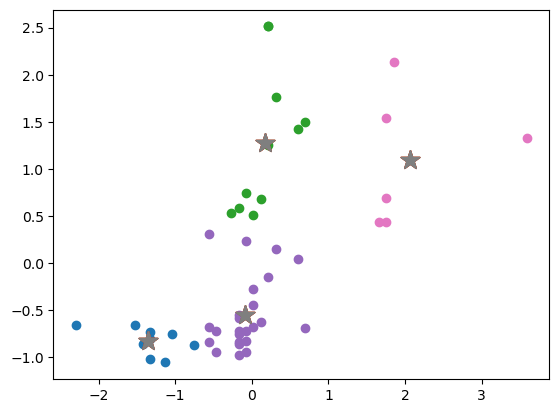

In [12]:
k = 4
for i in range (k):
    cluster_i = np.where(cluster==i)
    plt.scatter(X_std[cluster_i,0], X_std[cluster_i,1])
    plt.scatter(centroids[:,0],centroids[:,-1], marker='*', s=200)
plt.show()

La medida de silueta de cohesión y separación es una medida de bondad de ajuste. Un valor menor a 0.20 indica una mala calidad de la solución, un valor superior a 0.5 indica una buena solución.

In [13]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_std, cluster) #X_std son los datos y 'cluster' la asignación
print('\n Medida de silueta:', score)


 Medida de silueta: 0.4760316283225788


Algunos utilizan el método del codo (*elbow method*). En este método se calcula la *inercia* en diferentes valores de *k*. La inercia es la suma de las distancias al cuadrado de cada objeto del cluster a su centroide. Tras graficar estos valores, el punto en el cual cambia la tendencia corresponderá al número apropiado de grupos.

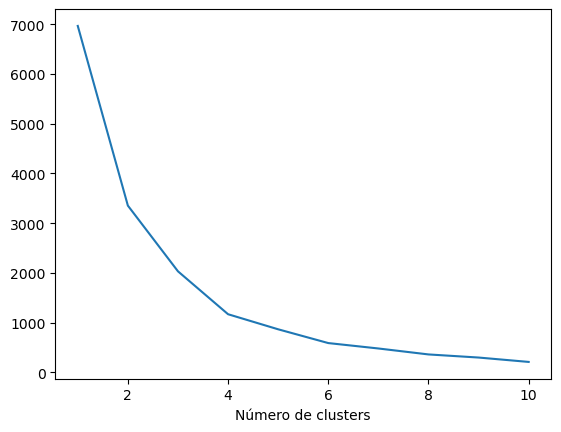

In [14]:
wss = [] #wss, del inglés Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

# Crear gráfico
plt.plot(range(1, 11), wss)
plt.xlabel('Número de clusters')
plt.show()

In [15]:
df['Segmento'] = cluster
df

,Cerveza,Tipo,Calorias,Alcohol,Contenido,Costo100ml,Pais,Importada,Bajo,Segmento
0,BARRILITO,Cerveza clara,32,3.56,325,3.00,México,0,0,0
1,DOS EQUIS XX Lager Especial,Cerveza,34,4.45,355,4.08,México,0,0,2
2,GUINESS DRAUGHT,Cerveza oscura,34,4.11,330,9.70,Irlanda,1,0,2
3,INDIO PILSNER PLATA,Cerveza,34,4.18,473,3.17,México,0,0,2
4,INDIO,Cerveza,35,4.05,1200,2.58,México,0,0,2
5,Victoria,Cerveza tipo Viena,35,3.91,325,3.87,México,0,0,2
6,SINGHA,Cerveza,37,4.94,330,10.91,Tailandia,1,0,1
7,Lager TECATE,Cerveza,38,4.64,355,3.66,México,0,0,2
8,CARTA BLANCA,Cerveza,39,4.46,355,2.58,México,0,0,2
9,Lucky Buddha,Cerveza de Malta,39,4.89,330,12.12,China,1,0,1


## Preguntas de autoevaluación
1. En tus propias palabras, ¿cuál es el objetivo de un análisis de conglomerados (cluster analysis)?
2. ¿Cuándo conviene utilizar el método jerárquico o el método de k-medias?

- 1.- Similitudes, clasificar datos, explotaratorios, ver patrones.
- 2.- 